In [1]:
import math
import blackbox
from multiprocessing import Pool

## Code that generated the plots below
1. This code was run
2. This code was commented out
3. This notebook was run again to generate the plots *without* generating the data again

In [2]:
# @blackbox.record
# def newton(x):
#     '''
#     Compute the square root of x.
#     '''
#     xi = 1
#     true_root = math.sqrt(x)
#     for i in range(0,20):
#         xi = .5*(xi+x/xi)
#         blackbox.log('iter', i)
#         blackbox.log('xi', xi)
#         error(xi, true_root)
#         blackbox.save(verbose=True)
#     return xi
# 
# def error(x,y):
#     '''
#     compute the error
#     '''
#     err = abs(x-y)
#     blackbox.log('error', err)
#     return err
# 
# def test_par_runs(i):
#     blackbox.takeoff(name='Newtons method worker:{}'.format(i), description='sample run', force=True)    
#     r = newton(i)
#     blackbox.land()
#     return r

In [ ]:
# blackbox.set_experiment('SquareRootParallel')
# pool = Pool(4)
# result  = pool.map(test_par_runs, [2, 20, 200, 2000])
# pool.close()

## Getting the data
We want to have all the data points represented by a list of dictionaries.

We want to update these dictionaries to include the experiment but that's it.

In [2]:
import pandas as pd
exp = blackbox.get_experiment('SquareRootParallel')
print exp.list_runs()

runs = []
for key in exp.list_runs():
    run = exp.get_run(key).events
    _ = [r.update({'experiment': key}) for r in run]
    runs += run
    
df = pd.DataFrame(runs)

['Newtons method worker:5', 'Newtons method worker:3', 'Newtons method worker:4', 'Newtons method worker:2', 'Newtons method worker:20', 'Newtons method worker:200', 'Newtons method worker:2000']


In [3]:
import pandas as pd
df = pd.DataFrame(runs)
df.head()

,duration,error,experiment,function_call,input,iter,result,timestamp,xi
0,NaN,NaN,Newtons method worker:5,NaN,NaN,NaN,NaN,1.478137e+09,NaN
1,NaN,7.639320e-01,Newtons method worker:5,NaN,NaN,0.0,NaN,1.478137e+09,3.000000
2,NaN,9.726536e-02,Newtons method worker:5,NaN,NaN,1.0,NaN,1.478137e+09,2.333333
3,NaN,2.027261e-03,Newtons method worker:5,NaN,NaN,2.0,NaN,1.478137e+09,2.238095
4,NaN,9.181436e-07,Newtons method worker:5,NaN,NaN,3.0,NaN,1.478137e+09,2.236069


## Plotting
We show plotting with

1. altair (the preferred tool)
2. altair_widgets which allows interactive exploration of the data
2. pandas
3. matplotlib 

### Altair
The main advantage of altair is that it's an *imperative* API not a *declarative* API. You tell Altair *what* to plot, not *how* to plot.

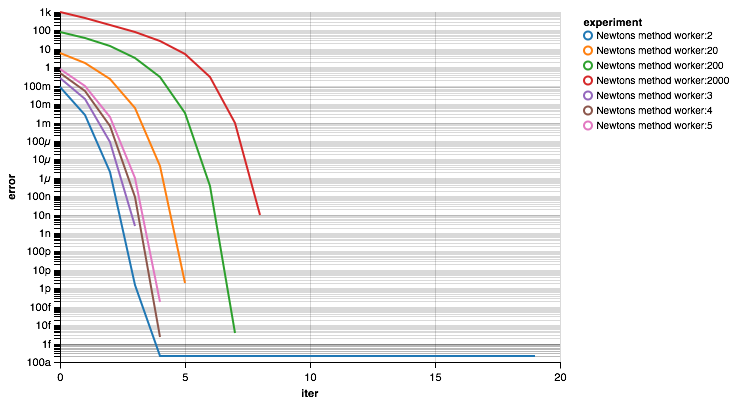

In [4]:
from altair import Chart, Y, Scale

Chart(df).mark_line().encode(
    x='iter', y=Y('error', scale=Scale(type='log')), color='experiment'
)

### `altair_widgets`
Note: the cell below has to be run to be viewed (GitHub can't parse it for security).

In [5]:
import altair_widgets as w

w.interact_with(df)

<altair_widgets.widget.Interact instance at 0x113fc4878>

### Pandas
I've touched pandas plotting but am no expert.

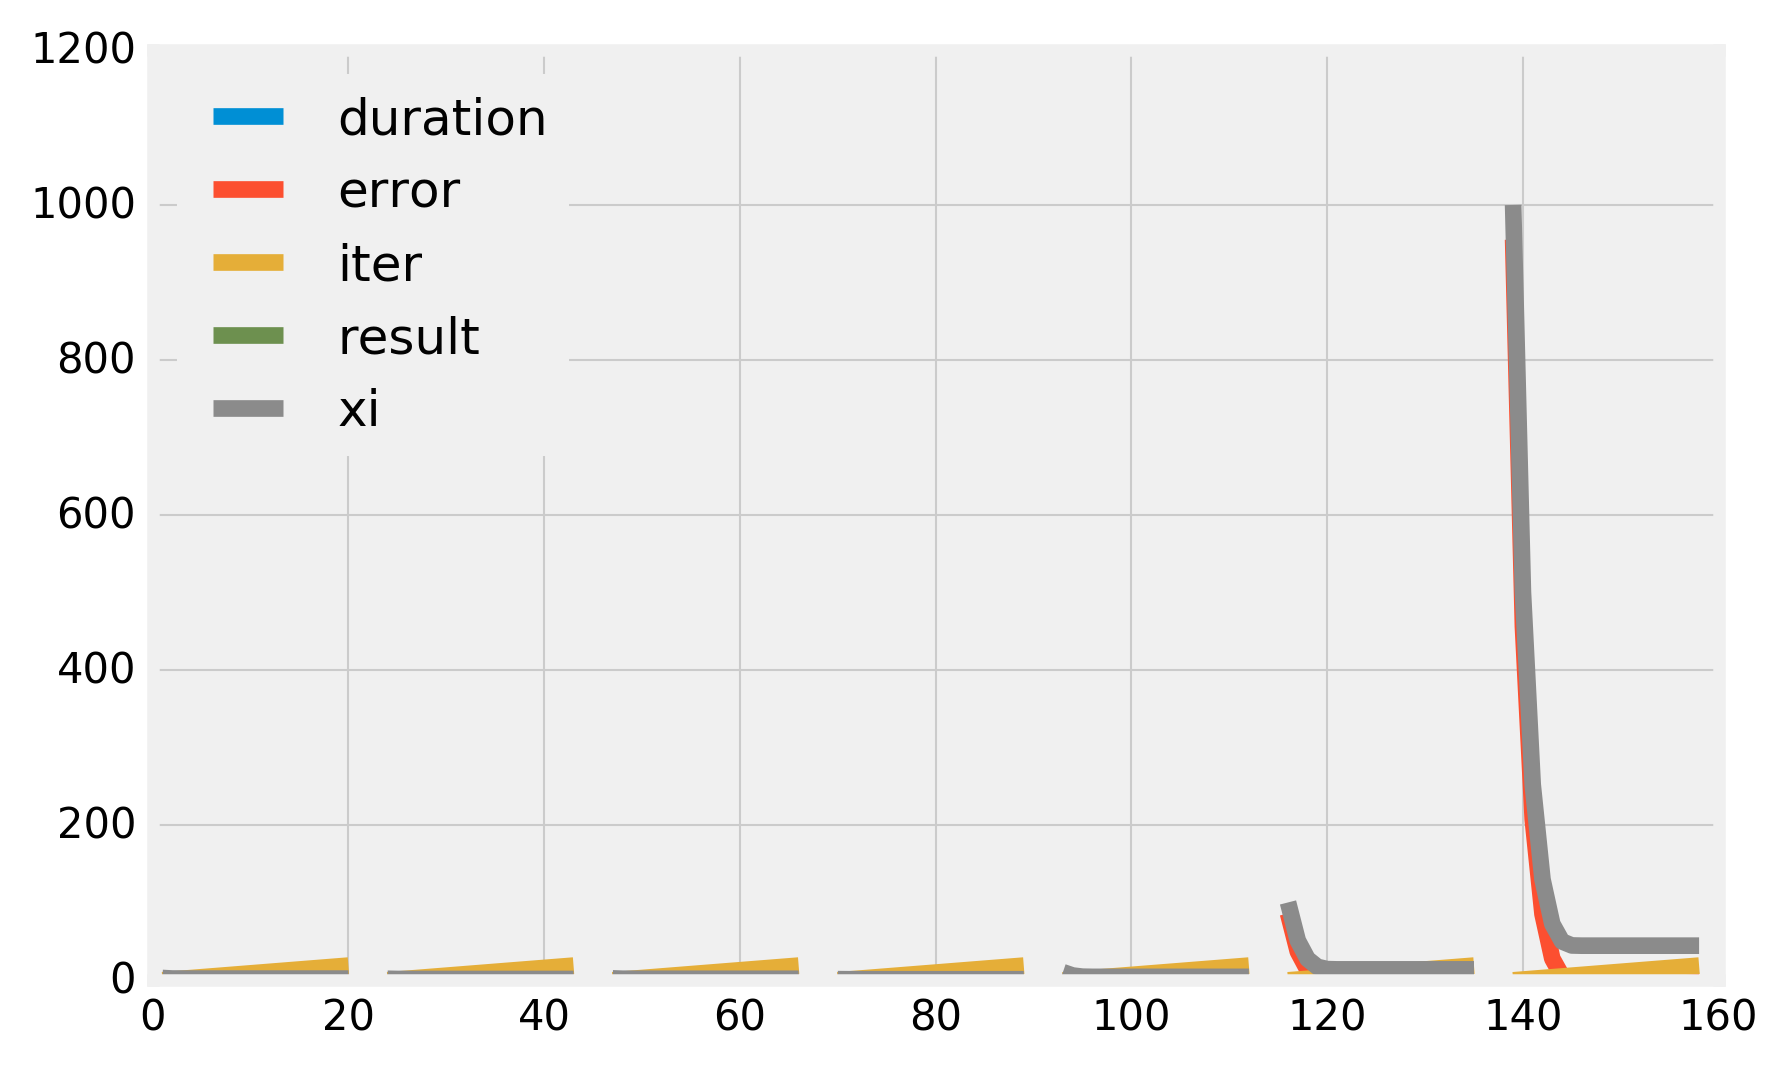

In [6]:
import matplotlib.pyplot as plt
if 'timestamp' in df.keys():
    del df['timestamp']
df.plot()#x='iter')
plt.show()

### matplotlib

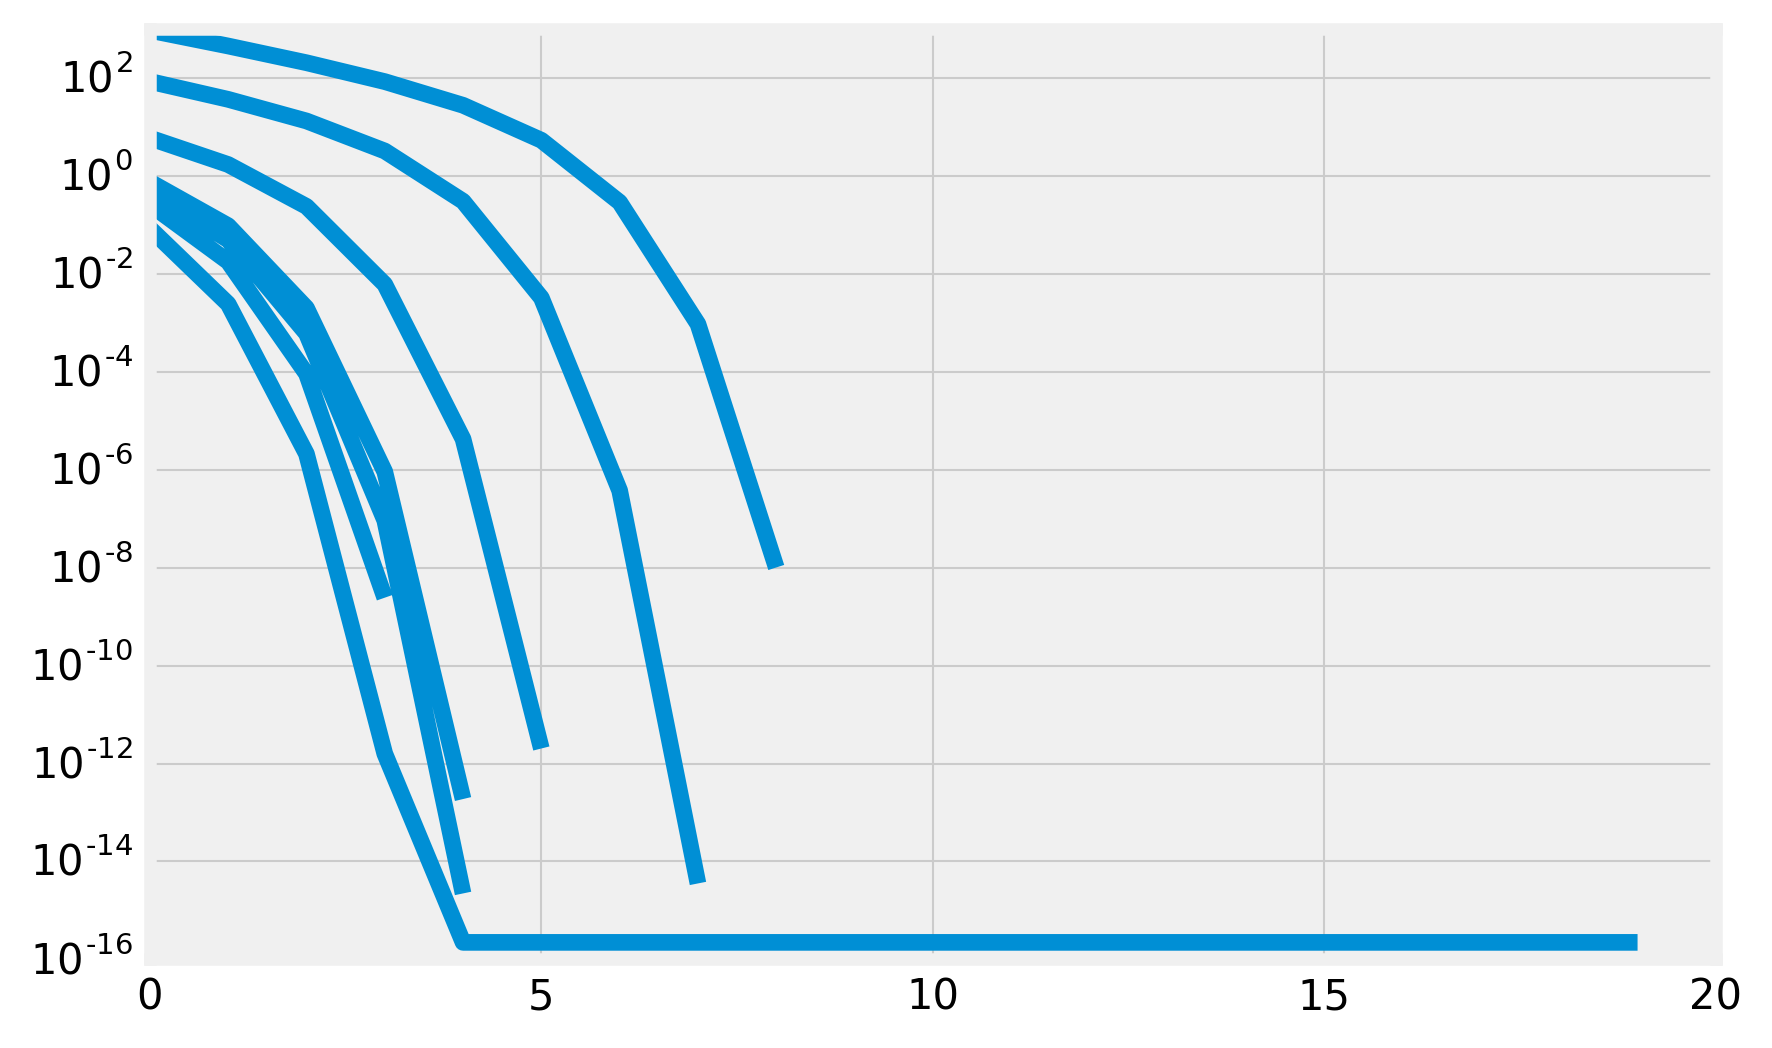

In [7]:
plt.figure()
plt.semilogy(df['iter'], df['error'])
plt.show()